## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.832902 -1.028470  0.065788  1.200288 -0.439288 -0.531442
1 -0.655346  0.070178  0.231505 -1.443490 -1.332733 -1.737184
2 -1.194036  0.854316  0.802624  0.368860  1.035796 -0.199640
3 -1.411296 -1.315145 -1.015777  0.343561 -0.371338 -0.745441
4 -1.489982 -0.795983 -0.147920  0.961769 -0.953575 -0.958266


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0465654	total: 57.8ms	remaining: 57.8s
1:	learn: 1.0370704	total: 58.2ms	remaining: 29.1s
2:	learn: 1.0249123	total: 58.9ms	remaining: 19.6s
3:	learn: 1.0115392	total: 59.4ms	remaining: 14.8s
4:	learn: 1.0017197	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9890517	total: 60.1ms	remaining: 9.96s
6:	learn: 0.9765114	total: 61.2ms	remaining: 8.69s
7:	learn: 0.9657814	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9545608	total: 62.1ms	remaining: 6.84s
9:	learn: 0.9446824	total: 62.6ms	remaining: 6.19s
10:	learn: 0.9343984	total: 63.3ms	remaining: 5.69s
11:	learn: 0.9234151	total: 63.8ms	remaining: 5.25s
12:	learn: 0.9108172	total: 64.2ms	remaining: 4.87s
13:	learn: 0.9007889	total: 64.7ms	remaining: 4.55s
14:	learn: 0.8909191	total: 65ms	remaining: 4.27s
15:	learn: 0.8813786	total: 65.4ms	remaining: 4.02s
16:	learn: 0.8705162	total: 65.7ms	remaining: 3.8s
17:	learn: 0.8604353	total: 66.4ms	remaining: 3.62s
18:	learn: 0.8522259	total: 66.8ms	remaining: 3

102:	learn: 0.3616180	total: 107ms	remaining: 931ms
103:	learn: 0.3584290	total: 107ms	remaining: 925ms
104:	learn: 0.3550114	total: 109ms	remaining: 928ms
105:	learn: 0.3513146	total: 109ms	remaining: 922ms
106:	learn: 0.3487170	total: 110ms	remaining: 916ms
107:	learn: 0.3451583	total: 110ms	remaining: 910ms
108:	learn: 0.3419389	total: 111ms	remaining: 905ms
109:	learn: 0.3386760	total: 111ms	remaining: 900ms
110:	learn: 0.3354653	total: 112ms	remaining: 895ms
111:	learn: 0.3322513	total: 112ms	remaining: 890ms
112:	learn: 0.3293585	total: 113ms	remaining: 884ms
113:	learn: 0.3266428	total: 113ms	remaining: 878ms
114:	learn: 0.3234800	total: 113ms	remaining: 873ms
115:	learn: 0.3208457	total: 114ms	remaining: 868ms
116:	learn: 0.3181631	total: 114ms	remaining: 863ms
117:	learn: 0.3157162	total: 115ms	remaining: 858ms
118:	learn: 0.3126044	total: 115ms	remaining: 852ms
119:	learn: 0.3099761	total: 116ms	remaining: 848ms
120:	learn: 0.3074321	total: 116ms	remaining: 844ms
121:	learn: 

267:	learn: 0.1034353	total: 186ms	remaining: 508ms
268:	learn: 0.1030607	total: 187ms	remaining: 507ms
269:	learn: 0.1023670	total: 187ms	remaining: 506ms
270:	learn: 0.1019372	total: 188ms	remaining: 505ms
271:	learn: 0.1012302	total: 188ms	remaining: 504ms
272:	learn: 0.1006767	total: 189ms	remaining: 503ms
273:	learn: 0.1003001	total: 189ms	remaining: 501ms
274:	learn: 0.1000031	total: 190ms	remaining: 500ms
275:	learn: 0.0993912	total: 190ms	remaining: 499ms
276:	learn: 0.0989053	total: 190ms	remaining: 497ms
277:	learn: 0.0986126	total: 191ms	remaining: 496ms
278:	learn: 0.0981512	total: 191ms	remaining: 495ms
279:	learn: 0.0978183	total: 192ms	remaining: 493ms
280:	learn: 0.0972331	total: 192ms	remaining: 492ms
281:	learn: 0.0969368	total: 193ms	remaining: 491ms
282:	learn: 0.0963909	total: 193ms	remaining: 490ms
283:	learn: 0.0961009	total: 194ms	remaining: 489ms
284:	learn: 0.0957885	total: 194ms	remaining: 488ms
285:	learn: 0.0954175	total: 195ms	remaining: 486ms
286:	learn: 

508:	learn: 0.0330583	total: 288ms	remaining: 278ms
509:	learn: 0.0329378	total: 289ms	remaining: 277ms
510:	learn: 0.0327483	total: 289ms	remaining: 277ms
511:	learn: 0.0326308	total: 289ms	remaining: 276ms
512:	learn: 0.0325160	total: 290ms	remaining: 275ms
513:	learn: 0.0324038	total: 290ms	remaining: 275ms
514:	learn: 0.0323391	total: 291ms	remaining: 274ms
515:	learn: 0.0322755	total: 291ms	remaining: 273ms
516:	learn: 0.0321386	total: 292ms	remaining: 272ms
517:	learn: 0.0320759	total: 292ms	remaining: 272ms
518:	learn: 0.0319494	total: 293ms	remaining: 271ms
519:	learn: 0.0318120	total: 293ms	remaining: 271ms
520:	learn: 0.0316291	total: 294ms	remaining: 270ms
521:	learn: 0.0315682	total: 294ms	remaining: 269ms
522:	learn: 0.0314371	total: 295ms	remaining: 269ms
523:	learn: 0.0313773	total: 295ms	remaining: 268ms
524:	learn: 0.0312489	total: 296ms	remaining: 267ms
525:	learn: 0.0310779	total: 296ms	remaining: 267ms
526:	learn: 0.0308741	total: 296ms	remaining: 266ms
527:	learn: 

631:	learn: 0.0208321	total: 358ms	remaining: 208ms
632:	learn: 0.0208175	total: 358ms	remaining: 208ms
633:	learn: 0.0207697	total: 359ms	remaining: 207ms
634:	learn: 0.0206795	total: 360ms	remaining: 207ms
635:	learn: 0.0206051	total: 360ms	remaining: 206ms
636:	learn: 0.0205712	total: 361ms	remaining: 205ms
637:	learn: 0.0205572	total: 361ms	remaining: 205ms
638:	learn: 0.0205410	total: 362ms	remaining: 204ms
639:	learn: 0.0205251	total: 362ms	remaining: 204ms
640:	learn: 0.0204895	total: 363ms	remaining: 203ms
641:	learn: 0.0204221	total: 363ms	remaining: 202ms
642:	learn: 0.0203770	total: 363ms	remaining: 202ms
643:	learn: 0.0202903	total: 364ms	remaining: 201ms
644:	learn: 0.0202332	total: 365ms	remaining: 201ms
645:	learn: 0.0201729	total: 365ms	remaining: 200ms
646:	learn: 0.0201180	total: 366ms	remaining: 200ms
647:	learn: 0.0200633	total: 366ms	remaining: 199ms
648:	learn: 0.0200194	total: 367ms	remaining: 198ms
649:	learn: 0.0199661	total: 367ms	remaining: 198ms
650:	learn: 

847:	learn: 0.0112161	total: 461ms	remaining: 82.7ms
848:	learn: 0.0111617	total: 462ms	remaining: 82.1ms
849:	learn: 0.0111001	total: 462ms	remaining: 81.5ms
850:	learn: 0.0110571	total: 463ms	remaining: 81ms
851:	learn: 0.0110034	total: 463ms	remaining: 80.4ms
852:	learn: 0.0109612	total: 463ms	remaining: 79.8ms
853:	learn: 0.0109088	total: 464ms	remaining: 79.3ms
854:	learn: 0.0108500	total: 464ms	remaining: 78.7ms
855:	learn: 0.0108091	total: 465ms	remaining: 78.2ms
856:	learn: 0.0107576	total: 465ms	remaining: 77.6ms
857:	learn: 0.0107177	total: 465ms	remaining: 77ms
858:	learn: 0.0107004	total: 466ms	remaining: 76.5ms
859:	learn: 0.0106330	total: 466ms	remaining: 75.9ms
860:	learn: 0.0105835	total: 467ms	remaining: 75.4ms
861:	learn: 0.0105181	total: 467ms	remaining: 74.8ms
862:	learn: 0.0104797	total: 468ms	remaining: 74.3ms
863:	learn: 0.0104161	total: 468ms	remaining: 73.7ms
864:	learn: 0.0103770	total: 469ms	remaining: 73.2ms
865:	learn: 0.0103606	total: 469ms	remaining: 72.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

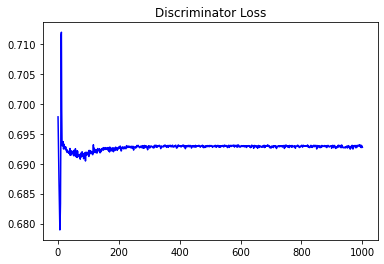

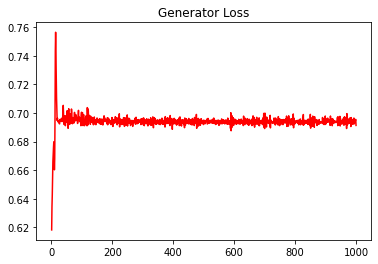

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1580620699294921


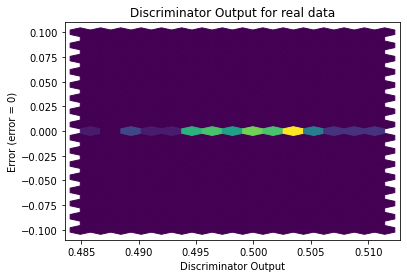

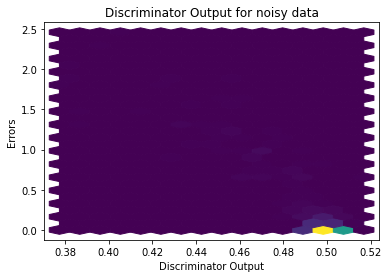

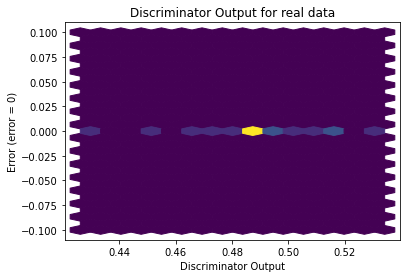

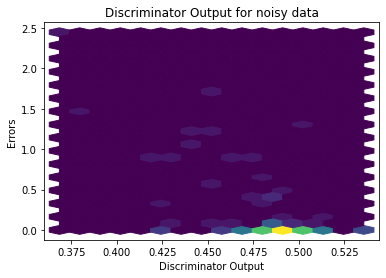

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


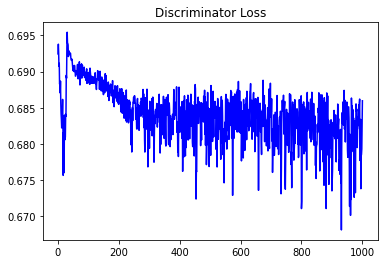

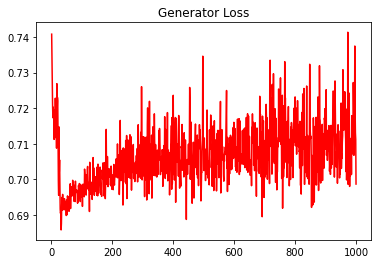

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04762597835364652


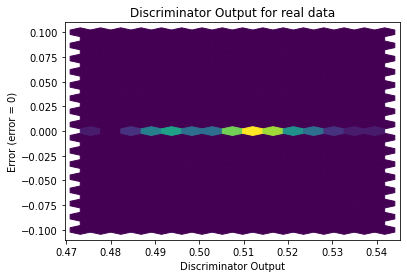

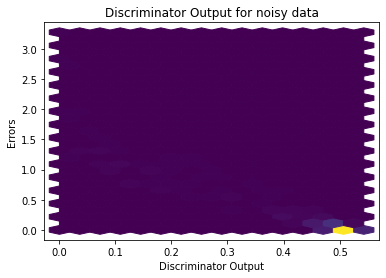

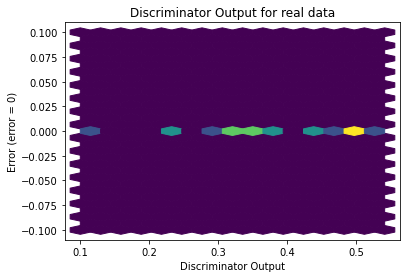

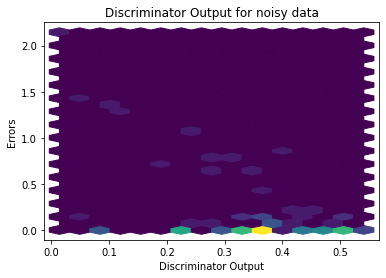

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1644]], requires_grad=True)
